In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_csv("C:\\Users\\saha1\\OneDrive\\Desktop\\WIDS Project\\Datasets\\Final_combine.csv")
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [3]:
df_train.head(5)

,Unnamed: 0,patient_id,Area,Side,isICD10,metastatic_first_treatment,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment_OLAPARIB,metastatic_first_novel_treatment_PEMBROLIZUMAB,breast_cancer_diagnosis_year,insurance,patient_race_Asian,patient_race_Black,patient_race_Hispanic,patient_race_Other,patient_race_Unspecified,patient_race_White,patient_state,patient_age,bmi,male,married,family_size,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,age_under_10,age_10_to_19,age_30s,age_40s,age_over_80,divorced,widowed,veteran,region,division,population,density,population_category,density_category,income_household_median,income_household_six_figure,rent_median,unemployment_rate,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_individual_median,education_college_or_above,education_highschool,education_some_college,education_bachelors,education_stem_degree,commute_time,housing_units,home_value,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_150_over,poverty,rent_burden,education_less_highschool,education_graduate,health_uninsured,home_ownership,labor_force_participation,family_dual_income,treatment_pd
0,0,100051,unspecified,unspecified,1,PACLITAXEL,C7951,0,0,2018,1,0,0,0,0,1,0,46,-0.576369,1.0,0.291977,0.286344,-1.858965,-0.226745,1.141220,-0.496801,-0.253674,-0.199041,-0.720498,-0.607789,-1.299018,-1.170622,-0.608886,-2.017974,-0.101734,0.554533,0.549683,3.492060,South,South Atlantic,13242,299.253333,Small Town,Low Density,71312.20588,27.180488,1117.714286,5.009524,8.573171,12.302439,20.131707,12.958537,13.660976,34666.87805,28.045455,30.254545,28.159091,15.856818,40.085000,25.066667,5129.066667,265131.3333,2.892683,1.770732,5.265854,5.690244,3.226829,13.519512,13.185366,30.780000,13.550000,12.188636,8.607317,70.834146,61.397727,51.697500,58
1,1,100203,upper-outer,right,1,DOXORUBICIN HCL,C773,0,0,2018,1,0,0,0,0,1,0,9,0.227067,2.0,-0.441641,-0.507392,0.560214,-0.633412,0.284192,-0.515939,-0.266790,-0.219023,-0.118429,3.519469,-0.189818,-0.951717,0.687696,1.727478,0.420298,1.263827,-0.341713,-1.543115,South,South Atlantic,32046,3045.050794,Medium-sized City,High Density,71422.16129,31.846774,1646.491803,4.987097,8.924194,11.253226,15.800000,11.732258,14.241935,33791.38710,38.617742,23.185484,23.167742,22.733871,43.700000,31.091935,11515.984130,405353.3898,3.648387,3.461290,4.635484,4.232258,4.458065,17.604839,14.201613,41.054237,15.020968,15.883871,14.029032,53.083871,63.503226,53.327419,79
2,2,100344,upper-inner,right,1,CARBOPLATIN,C7951,0,0,2016,3,0,0,0,1,0,0,31,0.137796,-1.0,-1.781535,1.082274,-2.024573,0.790931,-0.473583,-0.407000,-0.296698,-0.217395,-0.373813,-0.668625,-1.545390,-1.383470,-1.579207,-2.486196,1.810934,-1.611503,0.565426,-0.178743,Northeast,Middle Atlantic,8718,311.675862,Small Town,Low Density,87609.64000,37.933333,1328.714286,7.462963,5.962963,8.562963,17.529630,18.703704,16.203704,40037.88462,41.588889,27.111111,25.122222,24.144444,41.244444,23.324000,3438.724138,419483.9167,1.881481,1.355556,2.518519,2.485185,3.077778,21.729630,7.670370,36.522222,6.177778,17.444444,4.988889,82.651852,57.988889,47.718519,1
3,3,100416,unspecified,unspecified,1,PACLITAXEL,C773,0,0,2017,0,0,1,0,0,0,0,44,0.048526,-1.0,-0.038768,-0.682962,0.896484,-1.291107,0.857346,0.297649,-0.129039,-0.177599,1.005267,1.311447,1.557288,0.349878,1.281695,0.578796,-1.409389,0.004396,-0.880925,-1.066897,South,West South Central,33354,1836.728125,Medium-sized City,Medium Density,66076.27083,28.358333,1193.593750,6.705208,10.179167,12.715625,17.112500,10.932292,12.794792,37965.45833,32.512500,22.503125,23.679167,19.410417,47.445833,27.925000,12096.218750,247842.7340,4.081250,3.090625,4.352083,4.469792,4.707292,15.563542,18.729167,32.918750,21.300000,13.102083,22.544792,49.695833,66.167708,51.240625,130
4,4,100462,central portion

In [4]:
df_train.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df_train.shape

(27654, 76)

In [6]:
#Identifying all the numerical and categorical features

numerical_cols = df_train.select_dtypes(exclude=['object']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

In [7]:
print(numerical_cols)
print(categorical_cols)

Index(['patient_id', 'isICD10', 'metastatic_first_novel_treatment_OLAPARIB',
       'metastatic_first_novel_treatment_PEMBROLIZUMAB',
       'breast_cancer_diagnosis_year', 'insurance', 'patient_race_Asian',
       'patient_race_Black', 'patient_race_Hispanic', 'patient_race_Other',
       'patient_race_Unspecified', 'patient_race_White', 'patient_state',
       'patient_age', 'bmi', 'male', 'married', 'family_size', 'race_white',
       'race_black', 'race_asian', 'race_native', 'race_pacific', 'race_other',
       'race_multiple', 'age_under_10', 'age_10_to_19', 'age_30s', 'age_40s',
       'age_over_80', 'divorced', 'widowed', 'veteran', 'population',
       'density', 'income_household_median', 'income_household_six_figure',
       'rent_median', 'unemployment_rate', 'income_household_25_to_35',
       'income_household_35_to_50', 'income_household_50_to_75',
       'income_household_75_to_100', 'income_household_100_to_150',
       'income_individual_median', 'education_college_or

In [8]:
df_train=pd.get_dummies(df_train, columns=['Area', 'Side','metastatic_first_treatment','metastatic_cancer_diagnosis_code',
                                 'region','division','breast_cancer_diagnosis_year',
                                 'patient_state'])

In [9]:
city_dict = {'Small Town':1,'Medium-sized City':2}
density_dict = {'Low Density':1,'Medium Density':2,'High Density':3,'Very High Density':4}
df_train['population_category'] = df_train['population_category'].map(city_dict)
df_train['density_category'] = df_train['density_category'].map(density_dict)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27654 entries, 0 to 27653
Columns: 235 entries, patient_id to patient_state_51
dtypes: float64(53), int64(15), uint8(167)
memory usage: 18.8 MB


In [11]:
df_train.shape

(27654, 235)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27654 entries, 0 to 27653
Columns: 235 entries, patient_id to patient_state_51
dtypes: float64(53), int64(15), uint8(167)
memory usage: 18.8 MB


In [13]:
df_train.isnull().sum()

patient_id                                                       0
isICD10                                                          0
metastatic_first_novel_treatment_OLAPARIB                        0
metastatic_first_novel_treatment_PEMBROLIZUMAB                   0
insurance                                                        0
patient_race_Asian                                               0
patient_race_Black                                               0
patient_race_Hispanic                                            0
patient_race_Other                                               0
patient_race_Unspecified                                         0
patient_race_White                                               0
patient_age                                                      0
bmi                                                              0
male                                                             0
married                                                       

In [14]:
# Splitting the dataset into features and target variable
X = df_train.drop(['treatment_pd'], axis=1)
y = df_train['treatment_pd']

In [15]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
######################
#Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SVR 

In [18]:
# Create SVR model
svr = SVR(kernel='rbf')

In [19]:
# Fit the model on training data
svr.fit(X_train_scaled, y_train)

SVR()

In [22]:
# Make predictions on test data
y_pred = svr.predict(X_test_scaled)

In [23]:
print(y_pred)

[119.8810032   33.33467561 106.6835451  ...  51.98156968  37.10803586
 165.4900348 ]


In [24]:
len(y_pred)

5531

In [25]:
#Calculating RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 176.25949380012395


In [50]:
#Performing cross-validation
cv_scores = cross_val_score(svr_rbf, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = np.mean(cv_scores)
print("Mean Squared Error (Cross-validated):", mse_cv) 

Mean Squared Error (Cross-validated): -36547.169505575504


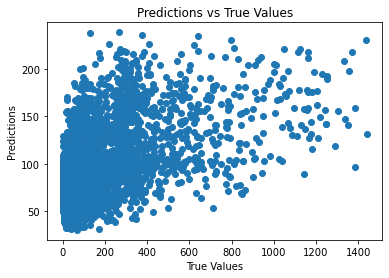

In [26]:
#Plotting the predicted values against true values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predictions vs True Values")
plt.show()

## Ridge Regression 

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [19]:
# Create Ridge Regression model
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

# Fit the model on training data
ridge_regressor.fit(X_train_scaled, y_train)

C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.38474e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.68317e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.73065e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.39185e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAl

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [20]:
# Make predictions on test data
y_pred = ridge_regressor.predict(X_test_scaled)

In [21]:
print(y_pred)

[276.39040775  22.47077981 305.77058217 ...  58.87117107  45.18919702
 281.55109243]


In [22]:
#Calculating RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 146.2772747911663


In [21]:
#Performing cross-validation
cv_scores = cross_val_score(ridge_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = np.mean(cv_scores)
print("Mean Squared Error (Cross-validated):", mse_cv) 

C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.67658e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.56734e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.33044e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.05435e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAl

C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.99613e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.93493e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.40198e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.31575e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAl

C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.74394e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.95753e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.93952e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.27135e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAl

Mean Squared Error (Cross-validated): -21502.731627802696


In [22]:
#Performing cross-validation
cv_scores = cross_val_score(ridge_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = np.mean(cv_scores)
print("Mean Squared Error (Cross-validated):", mse_cv) 

C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.01477e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.57299e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.62267e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.2257e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlg

Mean Squared Error (Cross-validated): -21910.07029763236


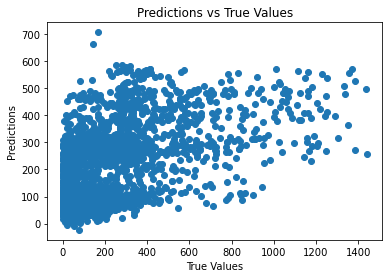

In [23]:
#Plotting the predicted values against true values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predictions vs True Values")
plt.show()

## Lasso Regression 

In [109]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [110]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [111]:
lasso_regressor.fit(X_train_scaled, y_train)

C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.892e+08, tolerance: 6.341e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.847e+08, tolerance: 6.186e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.815e+08, toleranc

C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.424e+06, tolerance: 6.384e+04
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [112]:
# Make predictions on test data
y_pred = lasso_regressor.predict(X_test_scaled)

In [113]:
print(y_pred)

[297.55429416  37.73714664 292.82155778 ...  70.88756547  53.07457606
 290.78979213]


In [114]:
#Calculating RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 145.94933897030143


In [19]:
#Performing cross-validation
cv_scores = cross_val_score(lasso_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mse_cv = np.mean(cv_scores)
print("Mean Squared Error (Cross-validated):", mse_cv) 

C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.504e+08, tolerance: 5.013e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.506e+08, tolerance: 5.019e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.490e+08, toleranc

C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.589e+06, tolerance: 5.185e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.493e+08, tolerance: 5.000e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.469e+08, toleranc

C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.714e+07, tolerance: 4.962e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.661e+07, tolerance: 5.030e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.459e+08, toleranc

C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.361e+06, tolerance: 4.880e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.358e+07, tolerance: 4.907e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.413e+06, toleranc

C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.146e+07, tolerance: 4.946e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.232e+06, tolerance: 4.987e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.421e+07, toleranc

C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.915e+06, tolerance: 5.198e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.358e+05, tolerance: 5.069e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\saha1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.816e+06, toleranc

Mean Squared Error (Cross-validated): -21693.168594758197


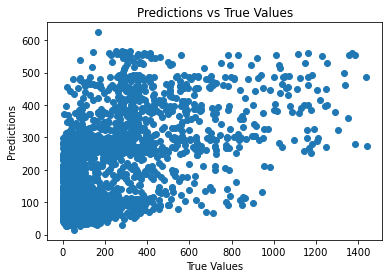

In [115]:
#Plotting the predicted values against true values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predictions vs True Values")
plt.show()

## Evaluation using test data 

In [27]:
df_test = pd.read_csv("C:\\Users\\saha1\\OneDrive\\Desktop\\WIDS Project\\Datasets\\Test_Final.csv")
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [28]:
df_test.head(5)

,Unnamed: 0,patient_id,population,density,insurance,income_household_median,income_household_six_figure,rent_median,unemployment_rate,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_individual_median,education_college_or_above,education_highschool,education_some_college,education_bachelors,education_stem_degree,commute_time,housing_units,home_value,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_150_over,poverty,rent_burden,education_less_highschool,education_graduate,health_uninsured,home_ownership,labor_force_participation,family_dual_income,patient_race_Asian,patient_race_Black,patient_race_Hispanic,patient_race_Other,patient_race_Unspecified,patient_race_White,patient_age,bmi,male,married,family_size,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,age_under_10,age_10_to_19,age_30s,age_40s,age_over_80,divorced,widowed,veteran,population_category,density_category,isICD10,Area_axillary tail,Area_breast,Area_central portion,Area_lower-inner,Area_lower-outer,Area_nipple and areola,Area_other,Area_overlapping,Area_unspecified,Area_upper-inner,Area_upper-outer,Side_left,Side_none,Side_right,Side_unspecified,metastatic_first_treatment_ATEZOLIZUMAB,metastatic_first_treatment_BEVACIZUMAB,metastatic_first_treatment_BLEOMYCIN SULFATE,metastatic_first_treatment_CAPECITABINE,metastatic_first_treatment_CARBOPLATIN,metastatic_first_treatment_CISPLATIN,metastatic_first_treatment_CYCLOPHOSPHAMIDE,metastatic_first_treatment_DOCETAXEL,metastatic_first_treatment_DOCETAXEL ANHYDROUS,metastatic_first_treatment_DOXORUBICIN HCL,metastatic_first_treatment_DOXORUBICIN HCL LIPOSOMAL,metastatic_first_treatment_DOXORUBICIN HYDROCHLORIDE,metastatic_first_treatment_EPIRUBICIN HCL,metastatic_first_treatment_ERIBULIN MESYLATE,metastatic_first_treatment_ERLOTINIB HYDROCHLORIDE,metastatic_first_treatment_EVEROLIMUS,metastatic_first_treatment_GEMCITABINE HCL,metastatic_first_treatment_GEMCITABINE HYDROCHLORIDE,metastatic_first_treatment_IPILIMUMAB,metastatic_first_treatment_IRINOTECAN HCL,metastatic_first_treatment_IXABEPILONE,metastatic_first_treatment_METHOTREXATE,metastatic_first_treatment_METHOTREXATE SODIUM,metastatic_first_treatment_NIVOLUMAB,metastatic_first_treatment_PACLITAXEL,metastatic_first_treatment_PACLITAXEL PROTEIN BOUND PARTICLES,metastatic_first_treatment_PEMETREXED DISODIUM,metastatic_first_treatment_TALAZOPARIB TOSYLATE,metastatic_first_treatment_TEMOZOLOMIDE,metastatic_first_treatment_TOPOTECAN HCL,metastatic_first_treatment_VINORELBINE TARTRATE,metastatic_cancer_diagnosis_code_C770,metastatic_cancer_diagnosis_code_C771,metastatic_cancer_diagnosis_code_C772,metastatic_cancer_diagnosis_code_C773,metastatic_cancer_diagnosis_code_C774,metastatic_cancer_diagnosis_code_C775,metastatic_cancer_diagnosis_code_C778,metastatic_cancer_diagnosis_code_C779,metastatic_cancer_diagnosis_code_C7800,metastatic_cancer_diagnosis_code_C7801,metastatic_cancer_diagnosis_code_C7802,metastatic_cancer_diagnosis_code_C781,metastatic_cancer_diagnosis_code_C782,metastatic_cancer_diagnosis_code_C7839,metastatic_cancer_diagnosis_code_C784,metastatic_cancer_diagnosis_code_C785,metastatic_cancer_diagnosis_code_C786,metastatic_cancer_diagnosis_code_C787,metastatic_cancer_diagnosis_code_C7880,metastatic_cancer_diagnosis_code_C7889,metastatic_cancer_diagnosis_code_C7901,metastatic_cancer_diagnosis_code_C7902,metastatic_cancer_diagnosis_code_C792,metastatic_cancer_diagnosis_code_C7931,metastatic_cancer_diagnosis_code_C7932,metastatic_cancer_diagnosis_code_C7940,metastatic_cancer_diagnosis_code_C7949,metastatic_cancer_diagnosis_code_C7951,metastatic_cancer_diagnosis_code_C7952,metastatic_cancer_diagnosis_code_C7960,metastatic_cancer_diagnosis_code_C7961,metastatic_cancer_diagnosis_code_C7962,metastatic_cancer_diagnosis_code_C7970,metastatic_cancer_diagnosi

In [29]:
df_test.drop(columns=['Unnamed: 0'], inplace=True)

In [30]:
df_test.head(5)

,patient_id,population,density,insurance,income_household_median,income_household_six_figure,rent_median,unemployment_rate,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_individual_median,education_college_or_above,education_highschool,education_some_college,education_bachelors,education_stem_degree,commute_time,housing_units,home_value,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_150_over,poverty,rent_burden,education_less_highschool,education_graduate,health_uninsured,home_ownership,labor_force_participation,family_dual_income,patient_race_Asian,patient_race_Black,patient_race_Hispanic,patient_race_Other,patient_race_Unspecified,patient_race_White,patient_age,bmi,male,married,family_size,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,age_under_10,age_10_to_19,age_30s,age_40s,age_over_80,divorced,widowed,veteran,population_category,density_category,isICD10,Area_axillary tail,Area_breast,Area_central portion,Area_lower-inner,Area_lower-outer,Area_nipple and areola,Area_other,Area_overlapping,Area_unspecified,Area_upper-inner,Area_upper-outer,Side_left,Side_none,Side_right,Side_unspecified,metastatic_first_treatment_ATEZOLIZUMAB,metastatic_first_treatment_BEVACIZUMAB,metastatic_first_treatment_BLEOMYCIN SULFATE,metastatic_first_treatment_CAPECITABINE,metastatic_first_treatment_CARBOPLATIN,metastatic_first_treatment_CISPLATIN,metastatic_first_treatment_CYCLOPHOSPHAMIDE,metastatic_first_treatment_DOCETAXEL,metastatic_first_treatment_DOCETAXEL ANHYDROUS,metastatic_first_treatment_DOXORUBICIN HCL,metastatic_first_treatment_DOXORUBICIN HCL LIPOSOMAL,metastatic_first_treatment_DOXORUBICIN HYDROCHLORIDE,metastatic_first_treatment_EPIRUBICIN HCL,metastatic_first_treatment_ERIBULIN MESYLATE,metastatic_first_treatment_ERLOTINIB HYDROCHLORIDE,metastatic_first_treatment_EVEROLIMUS,metastatic_first_treatment_GEMCITABINE HCL,metastatic_first_treatment_GEMCITABINE HYDROCHLORIDE,metastatic_first_treatment_IPILIMUMAB,metastatic_first_treatment_IRINOTECAN HCL,metastatic_first_treatment_IXABEPILONE,metastatic_first_treatment_METHOTREXATE,metastatic_first_treatment_METHOTREXATE SODIUM,metastatic_first_treatment_NIVOLUMAB,metastatic_first_treatment_PACLITAXEL,metastatic_first_treatment_PACLITAXEL PROTEIN BOUND PARTICLES,metastatic_first_treatment_PEMETREXED DISODIUM,metastatic_first_treatment_TALAZOPARIB TOSYLATE,metastatic_first_treatment_TEMOZOLOMIDE,metastatic_first_treatment_TOPOTECAN HCL,metastatic_first_treatment_VINORELBINE TARTRATE,metastatic_cancer_diagnosis_code_C770,metastatic_cancer_diagnosis_code_C771,metastatic_cancer_diagnosis_code_C772,metastatic_cancer_diagnosis_code_C773,metastatic_cancer_diagnosis_code_C774,metastatic_cancer_diagnosis_code_C775,metastatic_cancer_diagnosis_code_C778,metastatic_cancer_diagnosis_code_C779,metastatic_cancer_diagnosis_code_C7800,metastatic_cancer_diagnosis_code_C7801,metastatic_cancer_diagnosis_code_C7802,metastatic_cancer_diagnosis_code_C781,metastatic_cancer_diagnosis_code_C782,metastatic_cancer_diagnosis_code_C7839,metastatic_cancer_diagnosis_code_C784,metastatic_cancer_diagnosis_code_C785,metastatic_cancer_diagnosis_code_C786,metastatic_cancer_diagnosis_code_C787,metastatic_cancer_diagnosis_code_C7880,metastatic_cancer_diagnosis_code_C7889,metastatic_cancer_diagnosis_code_C7901,metastatic_cancer_diagnosis_code_C7902,metastatic_cancer_diagnosis_code_C792,metastatic_cancer_diagnosis_code_C7931,metastatic_cancer_diagnosis_code_C7932,metastatic_cancer_diagnosis_code_C7940,metastatic_cancer_diagnosis_code_C7949,metastatic_cancer_diagnosis_code_C7951,metastatic_cancer_diagnosis_code_C7952,metastatic_cancer_diagnosis_code_C7960,metastatic_cancer_diagnosis_code_C7961,metastatic_cancer_diagnosis_code_C7962,metastatic_cancer_diagnosis_code_C7970,metastatic_cancer_diagnosis_code_C797

In [31]:
df_test.shape

(11845, 234)

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11845 entries, 0 to 11844
Columns: 234 entries, patient_id to metastatic_first_treatment_THALIDOMIDE
dtypes: bool(156), float64(53), int64(25)
memory usage: 8.8 MB


In [33]:
#Identifying all the numerical and categorical features

numerical_cols = df_test.select_dtypes(exclude=['bool']).columns
categorical_cols = df_test.select_dtypes(include=['bool']).columns

In [34]:
#print(numerical_cols)
print(categorical_cols)

Index(['Area_axillary tail', 'Area_breast', 'Area_central portion',
       'Area_lower-inner', 'Area_lower-outer', 'Area_nipple and areola',
       'Area_other', 'Area_overlapping ', 'Area_unspecified',
       'Area_upper-inner',
       ...
       'patient_state_44', 'patient_state_45', 'patient_state_46',
       'patient_state_47', 'patient_state_48', 'patient_state_49',
       'patient_state_50', 'patient_state_51',
       'metastatic_first_novel_treatment_OLAPARIB',
       'metastatic_first_novel_treatment_PEMBROLIZUMAB'],
      dtype='object', length=156)


In [35]:
df_test_encoded=pd.get_dummies(df_test[categorical_cols])

In [36]:
df_test.shape

(11845, 234)

In [37]:
df_final=pd.concat([df_test[numerical_cols], df_test_encoded], axis=1)

In [38]:
df_final.shape

(11845, 234)

In [39]:
# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final)

In [40]:
# Make predictions on test data
y_test_pred = svr.predict(X_scaled)

In [130]:
print(y_test_pred)

[ 98.50810901 241.85176098 200.96972711 ...  61.82594553 147.04657732
 107.0766529 ]


In [41]:
len((y_test_pred))

11845

In [42]:
df_final.head()

,patient_id,population,density,insurance,income_household_median,income_household_six_figure,rent_median,unemployment_rate,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_individual_median,education_college_or_above,education_highschool,education_some_college,education_bachelors,education_stem_degree,commute_time,housing_units,home_value,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_150_over,poverty,rent_burden,education_less_highschool,education_graduate,health_uninsured,home_ownership,labor_force_participation,family_dual_income,patient_race_Asian,patient_race_Black,patient_race_Hispanic,patient_race_Other,patient_race_Unspecified,patient_race_White,patient_age,bmi,male,married,family_size,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,age_under_10,age_10_to_19,age_30s,age_40s,age_over_80,divorced,widowed,veteran,population_category,density_category,isICD10,metastatic_first_treatment_DRUG ASSAY EVEROLIMUS,metastatic_cancer_diagnosis_code_C7900,metastatic_first_treatment_EPIRUBICIN HYDROCHLORIDE,metastatic_first_treatment_NIRAPARIB,metastatic_cancer_diagnosis_code_C7910,region_Caribbean,metastatic_first_treatment_Inj gemcitabine hcl (accord),division_Puerto Rico,metastatic_first_treatment_PAZOPANIB HYDROCHLORIDE,metastatic_first_treatment_RUCAPARIB CAMSYLATE,metastatic_first_treatment_PEMETREXED DISODIUM HEPTAHYDRATE,metastatic_first_treatment_ETOPOSIDE,metastatic_first_treatment_THALIDOMIDE,Area_axillary tail,Area_breast,Area_central portion,Area_lower-inner,Area_lower-outer,Area_nipple and areola,Area_other,Area_overlapping,Area_unspecified,Area_upper-inner,Area_upper-outer,Side_left,Side_none,Side_right,Side_unspecified,metastatic_first_treatment_ATEZOLIZUMAB,metastatic_first_treatment_BEVACIZUMAB,metastatic_first_treatment_BLEOMYCIN SULFATE,metastatic_first_treatment_CAPECITABINE,metastatic_first_treatment_CARBOPLATIN,metastatic_first_treatment_CISPLATIN,metastatic_first_treatment_CYCLOPHOSPHAMIDE,metastatic_first_treatment_DOCETAXEL,metastatic_first_treatment_DOCETAXEL ANHYDROUS,metastatic_first_treatment_DOXORUBICIN HCL,metastatic_first_treatment_DOXORUBICIN HCL LIPOSOMAL,metastatic_first_treatment_DOXORUBICIN HYDROCHLORIDE,metastatic_first_treatment_EPIRUBICIN HCL,metastatic_first_treatment_ERIBULIN MESYLATE,metastatic_first_treatment_ERLOTINIB HYDROCHLORIDE,metastatic_first_treatment_EVEROLIMUS,metastatic_first_treatment_GEMCITABINE HCL,metastatic_first_treatment_GEMCITABINE HYDROCHLORIDE,metastatic_first_treatment_IPILIMUMAB,metastatic_first_treatment_IRINOTECAN HCL,metastatic_first_treatment_IXABEPILONE,metastatic_first_treatment_METHOTREXATE,metastatic_first_treatment_METHOTREXATE SODIUM,metastatic_first_treatment_NIVOLUMAB,metastatic_first_treatment_PACLITAXEL,metastatic_first_treatment_PACLITAXEL PROTEIN BOUND PARTICLES,metastatic_first_treatment_PEMETREXED DISODIUM,metastatic_first_treatment_TALAZOPARIB TOSYLATE,metastatic_first_treatment_TEMOZOLOMIDE,metastatic_first_treatment_TOPOTECAN HCL,metastatic_first_treatment_VINORELBINE TARTRATE,metastatic_cancer_diagnosis_code_C770,metastatic_cancer_diagnosis_code_C771,metastatic_cancer_diagnosis_code_C772,metastatic_cancer_diagnosis_code_C773,metastatic_cancer_diagnosis_code_C774,metastatic_cancer_diagnosis_code_C775,metastatic_cancer_diagnosis_code_C778,metastatic_cancer_diagnosis_code_C779,metastatic_cancer_diagnosis_code_C7800,metastatic_cancer_diagnosis_code_C7801,metastatic_cancer_diagnosis_code_C7802,metastatic_cancer_diagnosis_code_C781,metastatic_cancer_diagnosis_code_C782,metastatic_cancer_diagnosis_code_C7839,metastatic_cancer_diagnosis_code_C784,metastatic_cancer_diagnosis_code_C785,metastatic_cancer_diagnosis_code_C786,metastatic_cancer_diagnosis_code_C787,metastatic_cancer_diagnosis_code_C7880,metastatic_cancer_diagnosis_code_C7889

In [43]:
df_final['patient_id']

0        704520
1        849592
2        493101
3        775736
4        357414
          ...  
11840    430644
11841    695045
11842    417489
11843    623596
11844    313910
Name: patient_id, Length: 11845, dtype: int64

In [44]:
pred=pd.DataFrame(y_test_pred)

In [45]:
final=pd.concat([df_test['patient_id'],pred], axis=1)

In [46]:
final.head()

,patient_id,0
0,704520,70.978504
1,849592,111.438395
2,493101,104.711406
3,775736,76.566608
4,357414,80.947051


In [47]:
final.rename(columns={0: 'treatment_pd'}, inplace=True)

In [48]:
final.head()

,patient_id,treatment_pd
0,704520,70.978504
1,849592,111.438395
2,493101,104.711406
3,775736,76.566608
4,357414,80.947051


In [49]:
# Specify the file path to save the CSV file
file_path = "C:\\Users\\saha1\\OneDrive\\Desktop\\WIDS Project\\Datasets\\SVR.csv"

# Convert the DataFrame to CSV
final.to_csv(file_path, index=False)  

In [50]:
final.shape

(11845, 2)